In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional


In [2]:
data = pd.read_csv('Supply_data.csv')  # Example data loading
data.head(10)

,Asset_ID,Location,Temperature,Vibration,Last_Maintenance,Condition_Score,Resource_Utilization,Delivery_Efficiency,Downtime_Hours,Inventory_Level,Logistics_Cost,Timestamp,SupplyChain_Efficiency_Label
0,A0001,Lake Davidland,32.34,3.99,2023-09-28,67.39,87.04,79.99,3.22,Medium,5148.45,2024-09-13 19:31:26,0
1,A0002,West Andrew,25.99,0.80,2023-04-26,76.44,81.06,92.07,2.89,Low,4454.82,2023-09-17 22:20:17,1
2,A0003,New Kimberlyhaven,31.45,4.75,2024-12-23,61.85,79.64,88.15,1.65,High,3977.16,2024-09-08 19:32:27,1
3,A0004,Lake Cathyside,26.55,4.37,2024-10-22,63.60,79.88,72.63,8.07,Low,3248.65,2023-10-28 06:48:55,0
4,A0005,South Justin,41.66,1.43,2024-08-17,61.62,65.99,74.93,1.83,High,3121.08,2023-10-06 05:02:02,0
5,A0006,Ellisonton,45.53,2.01,2023-04-11,94.11,77.35,89.81,6.21,Medium,4978.57,2023-03-30 21:41:41,1
6,A0007,Dianamouth,22.62,3.79,2024-02-28,88.27,67.18,78.62,0.62,Low,4371.65,2024-04-28 04:45:48,0
7,A0008,New Dianaport,40.61,4.69,2023-01-26,70.51,62.85,95.43,3.04,High,4337.55,2023-01-23 05:43:53,0
8,A0009,Brianside,25.23,1.07,2024-06-05,57.14,91.77,97.90,0.77,High,4412.76,2023-11-07 19:38:15,2
9,A0010,Esteston,48.02,3.80,2023-10-14,59.75,70.13,79.88,6.85,Low,4316.42,2023-05-21 14:04:21,0


In [3]:
data.shape

(500, 13)

In [4]:
# Using pandas get_dummies
df_encoded = pd.get_dummies(data, columns=['Inventory_Level'], prefix='Level')

df_encoded.head(10)

,Asset_ID,Location,Temperature,Vibration,Last_Maintenance,Condition_Score,Resource_Utilization,Delivery_Efficiency,Downtime_Hours,Logistics_Cost,Timestamp,SupplyChain_Efficiency_Label,Level_High,Level_Low,Level_Medium
0,A0001,Lake Davidland,32.34,3.99,2023-09-28,67.39,87.04,79.99,3.22,5148.45,2024-09-13 19:31:26,0,False,False,True
1,A0002,West Andrew,25.99,0.80,2023-04-26,76.44,81.06,92.07,2.89,4454.82,2023-09-17 22:20:17,1,False,True,False
2,A0003,New Kimberlyhaven,31.45,4.75,2024-12-23,61.85,79.64,88.15,1.65,3977.16,2024-09-08 19:32:27,1,True,False,False
3,A0004,Lake Cathyside,26.55,4.37,2024-10-22,63.60,79.88,72.63,8.07,3248.65,2023-10-28 06:48:55,0,False,True,False
4,A0005,South Justin,41.66,1.43,2024-08-17,61.62,65.99,74.93,1.83,3121.08,2023-10-06 05:02:02,0,True,False,False
5,A0006,Ellisonton,45.53,2.01,2023-04-11,94.11,77.35,89.81,6.21,4978.57,2023-03-30 21:41:41,1,False,False,True
6,A0007,Dianamouth,22.62,3.79,2024-02-28,88.27,67.18,78.62,0.62,4371.65,2024-04-28 04:45:48,0,False,True,False
7,A0008,New Dianaport,40.61,4.69,2023-01-26,70.51,62.85,95.43,3.04,4337.55,2023-01-23 05:43:53,0,True,False,False
8,A0009,Brianside,25.23,1.07,2024-06-05,57.14,91.77,97.90,0.77,4412.76,2023-11-07 19:38:15,2,True,False,False
9,A0010,Esteston,48.02,3.80,2023-10-14,59.75,70.13,79.88,6.85,4316.42,2023-05-21 14:04:21,0,False,True,False


In [5]:
df_encoded.shape

(500, 15)

In [6]:
final_data = df_encoded.drop(columns=['Asset_ID', 'Location', 'Last_Maintenance', 'Timestamp'])

In [7]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Temperature                   500 non-null    float64
 1   Vibration                     500 non-null    float64
 2   Condition_Score               500 non-null    float64
 3   Resource_Utilization          500 non-null    float64
 4   Delivery_Efficiency           500 non-null    float64
 5   Downtime_Hours                500 non-null    float64
 6   Logistics_Cost                500 non-null    float64
 7   SupplyChain_Efficiency_Label  500 non-null    int64  
 8   Level_High                    500 non-null    bool   
 9   Level_Low                     500 non-null    bool   
 10  Level_Medium                  500 non-null    bool   
dtypes: bool(3), float64(7), int64(1)
memory usage: 32.8 KB


In [8]:
# Assuming df is your DataFrame
X = final_data.drop('SupplyChain_Efficiency_Label', axis=1)
y = final_data['SupplyChain_Efficiency_Label']

In [9]:
from tensorflow.keras.utils import to_categorical
# Convert labels to one-hot encoded format
y_cat = to_categorical(y, num_classes=3)  # Assumes classes are 0, 1, 2
# y_cat

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Softmax for multi-class classification
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,059 (19.76 KB)

 Trainable params: 5,059 (19.76 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5345 - loss: 0.9011 - val_accuracy: 0.6500 - val_loss: 0.6969
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8331 - loss: 0.6082 - val_accuracy: 0.6750 - val_loss: 0.5895
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8538 - loss: 0.4586 - val_accuracy: 0.6500 - val_loss: 0.5363
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8651 - loss: 0.4093 - val_accuracy: 0.7250 - val_loss: 0.5099
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8710 - loss: 0.3862 - val_accuracy: 0.7000 - val_loss: 0.4670
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8936 - loss: 0.3104 - val_accuracy: 0.7500 - val_loss: 0.4429
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8716 - loss: 0.3537 - val_accuracy: 0.7500 - val_loss: 0.4276
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9105 - loss: 0.2622 - val_accuracy: 0.7500 - val_loss

In [14]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9100


In [15]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.85      0.95      0.90        43
           2       0.00      0.00      0.00         4

    accuracy                           0.91       100
   macro avg       0.61      0.63      0.62       100
weighted avg       0.88      0.91      0.89       100

Confusion Matrix:
[[50  3  0]
 [ 2 41  0]
 [ 0  4  0]]


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

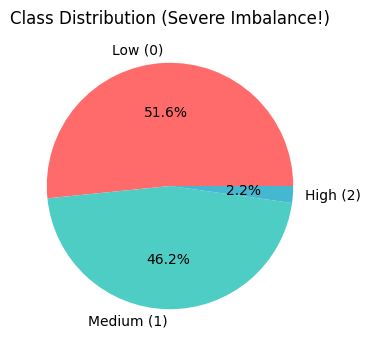

In [16]:
import matplotlib.pyplot as plt

# After y = final_data['SupplyChain_Efficiency_Label']
class_counts = y.value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.pie(class_counts, labels=['Low (0)', 'Medium (1)', 'High (2)'], 
        autopct='%1.1f%%', colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Class Distribution (Severe Imbalance!)')
plt.savefig('class_dist.png', dpi=150, bbox_inches='tight')

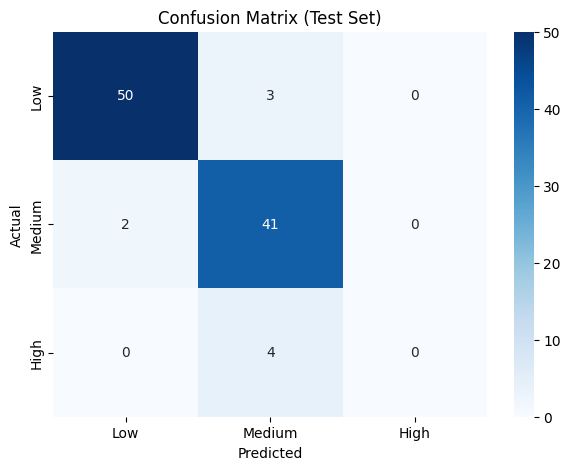

In [17]:
import seaborn as sns

cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.savefig('confusion_matrix.png', dpi=150)

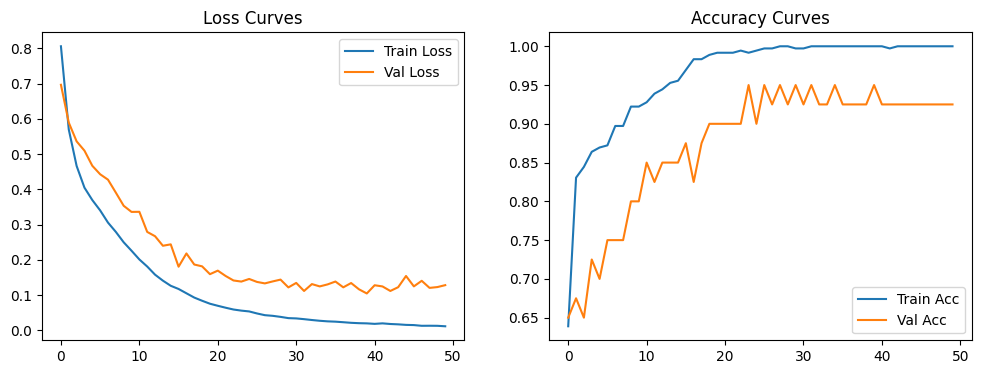

In [18]:
# After model.fit()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss Curves')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Accuracy Curves')
plt.savefig('learning_curves.png', dpi=150)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_deep\deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 10))']
  warnings.warn(msg)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(100, 10))']
  warnings.warn(msg)


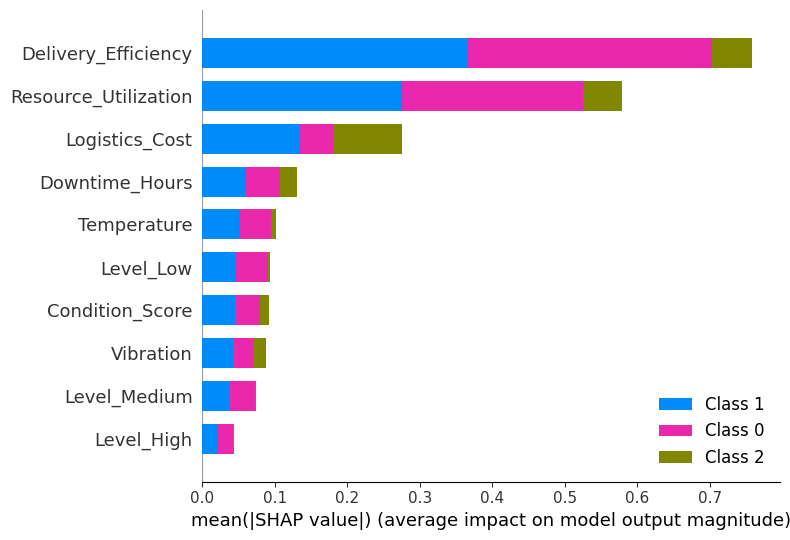

<Figure size 640x480 with 0 Axes>

In [20]:
# SHAP values for interpretability (add after training)
import shap
explainer = shap.DeepExplainer(model, X_train_scaled[:50])  # Sample 50 for speed
shap_values = explainer.shap_values(X_test_scaled[:100])

plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test_scaled[:100], 
                  feature_names=X.columns, plot_type="bar")
plt.savefig('feature_importance.png', dpi=150)